In [1]:
# This line allows you to display matplotlib plots within the Jupyter Notebook
%matplotlib inline

# Import External packages 

import os
import numpy as np
import matplotlib.pyplot as plt

# Configure the working directory (Important: This should be set to home directory of 'dynworm' folder)

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)

# Import Main module

import dynworm as dw

In [3]:
# Setting AVL to True enable its voltage gated channels to support action potential as described by Qiang et al 2019
# https://www.cell.com/cell/fulltext/S0092-8674(18)31034-1?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867418310341%3Fshowall%3Dtrue

additional_params = {"AWA": True,
                     "AVL": False}

In [4]:
# Provide additional_params to initialize_params_neural() to enable spiking AVL neuron

dw.network_sim.initialize_params_neural(additional_params = additional_params)
dw.network_sim.initialize_connectivity()

Using the default neural parameters
Using additional neural parameters
Using the default connectivity


In [16]:
print(dw.utils.neuron_names_2_inds(['AWAL']))

[73]


In [5]:
input_vec = np.zeros(dw.network_sim.params_obj_neural['N'])
ablation_mask = np.ones(dw.network_sim.params_obj_neural['N'], dtype = 'bool')

In [6]:
# Ablating AWAL disconnets it from the rest of the network so there is no synaptic or gap currents from other neurons
# This emulates the experimental setting Qiang used to measure the spikes of AWA with real C. elegans
# If including spiking AWA neuron as part of the network dynamics skip this step

ablation_mask[73] = False

In [8]:
# Seaborn plot setting

import seaborn as sns

sns.set(style = 'ticks', font_scale = 2.1)

24
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


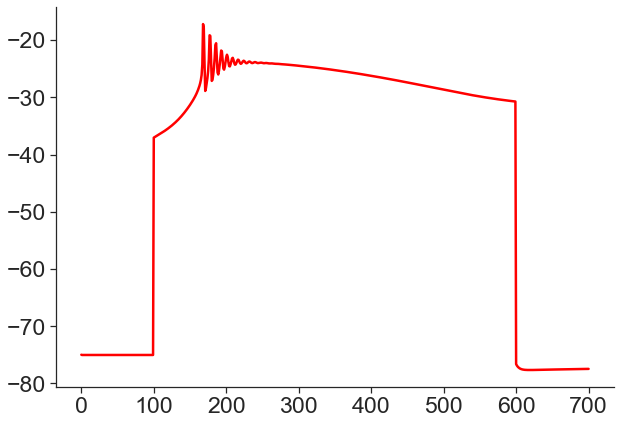

22
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


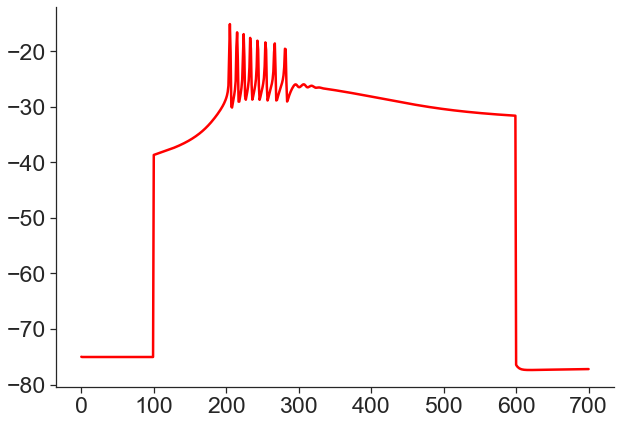

20
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


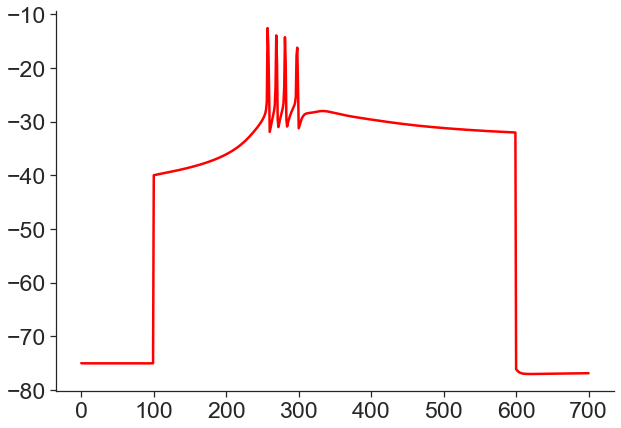

18
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


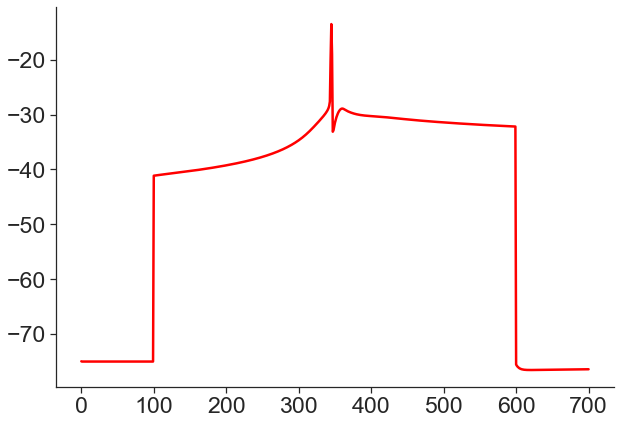

16
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


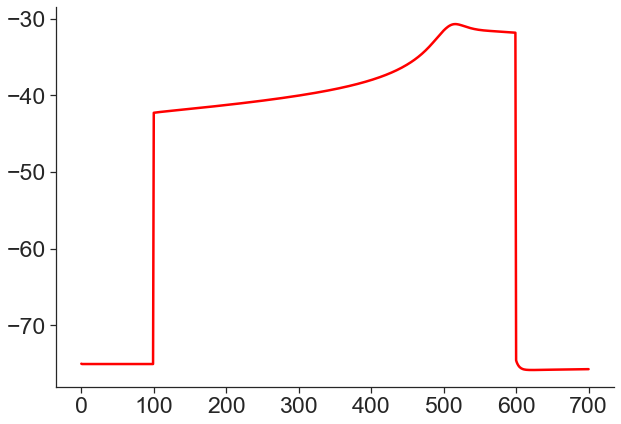

14
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


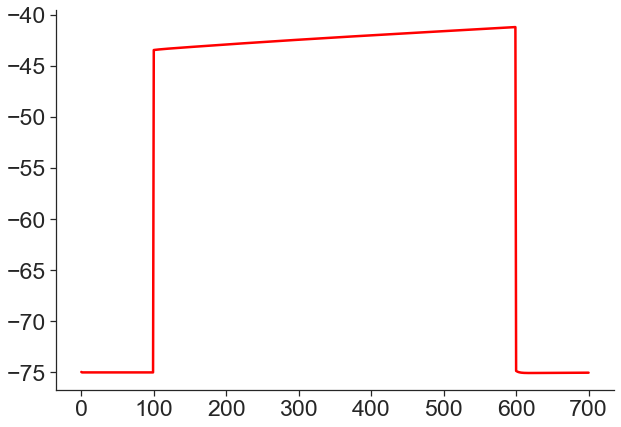

12
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


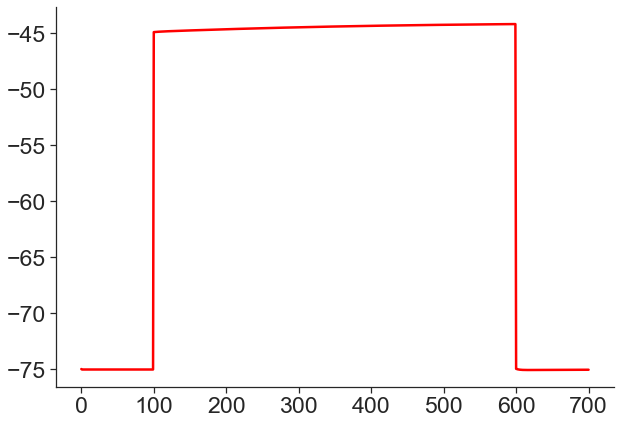

10
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


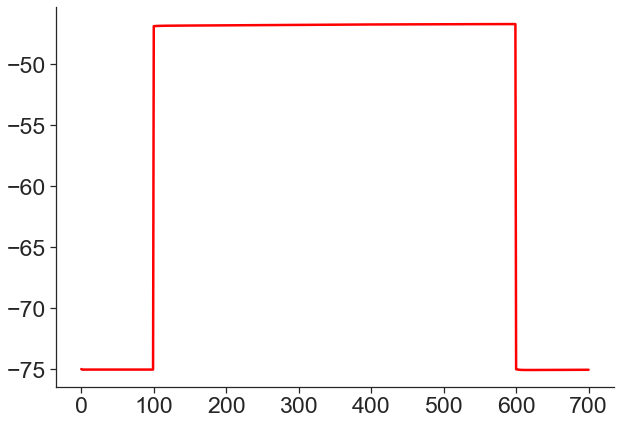

8
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


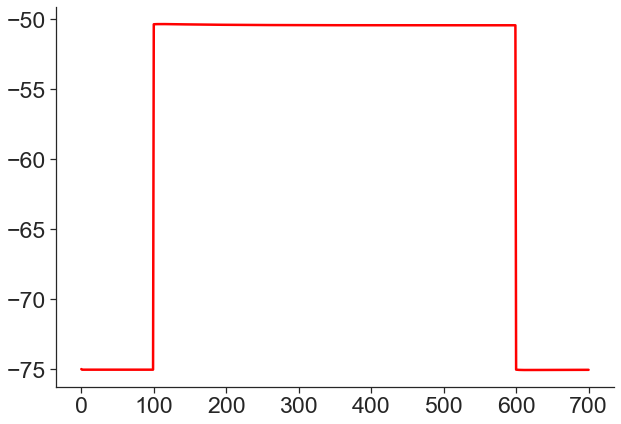

6
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


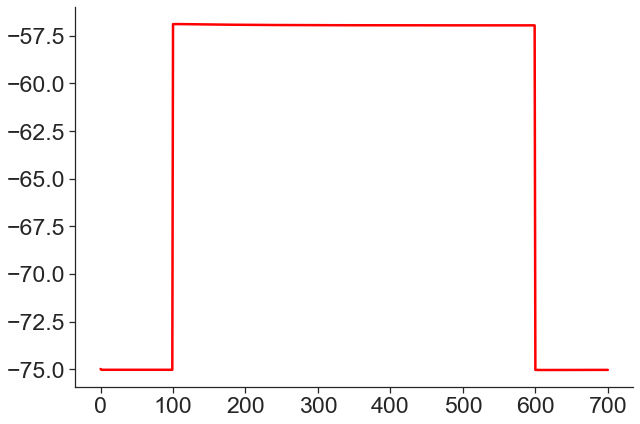

4
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


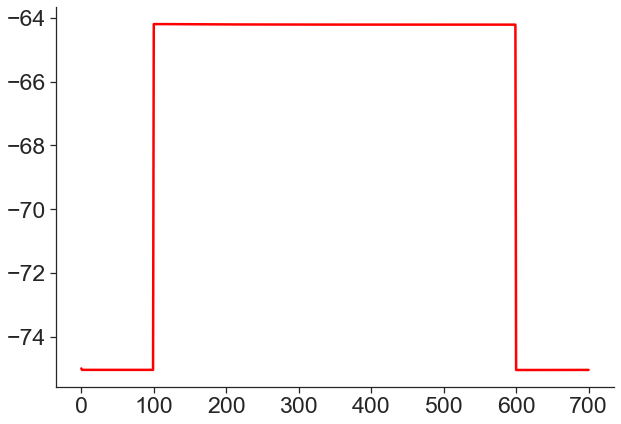

2
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


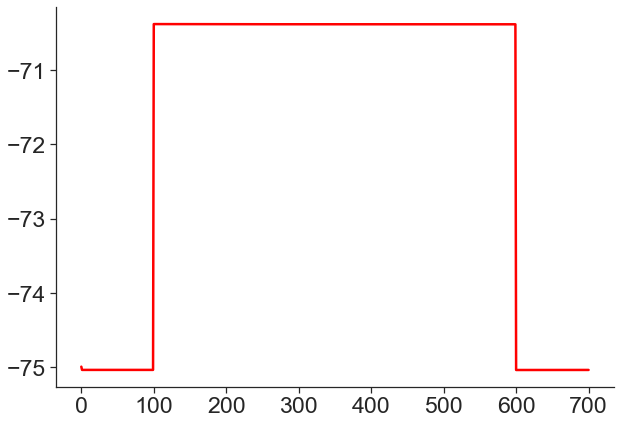

0
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


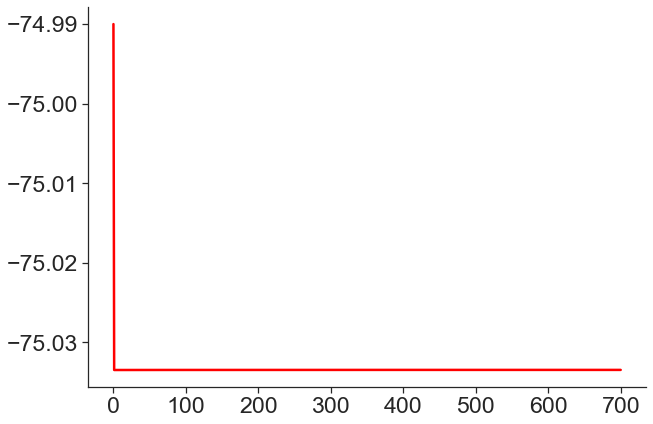

-2
Network integration prep completed...
Computing network dynamics...
11.0% completed
22.0% completed
33.0% completed
44.0% completed
55.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


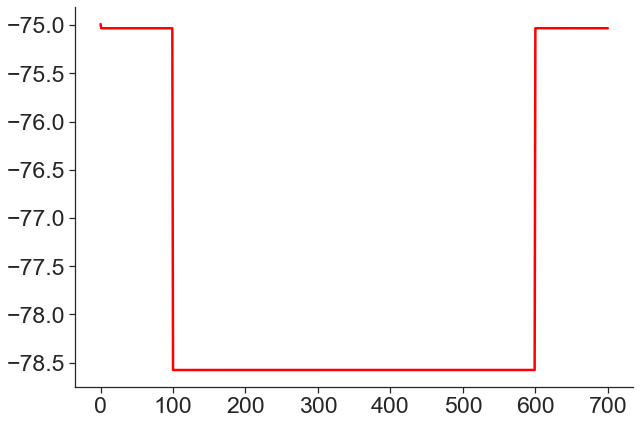

In [9]:
# A for loop where each loop simulates the voltage activity of AVL when given input current ranging from -2pA to 12pA
# Reproduces Figure 5B from Qiang's Cell paper above

AWA_external_input_current_list = np.arange(-1, 13) * 2
awa_voltage_sols = []

for stim in AWA_external_input_current_list[::-1]:
    
    print(stim)

    input_mat = np.zeros((701, 279))
    input_mat[100:600, 73] = stim
    
    result_dict_network = dw.network_sim.run_network_dyninput(input_mat = input_mat, ablation_mask = ablation_mask)
    v_sol = result_dict_network['raw_v_solution']
    
    awa_voltage_sols.append(v_sol[:, 73])
    
    plt.figure(figsize = (10, 7))

    plt.plot(v_sol[:, 73], linewidth = 2.5, color = 'red')
    sns.despine()
    plt.show()

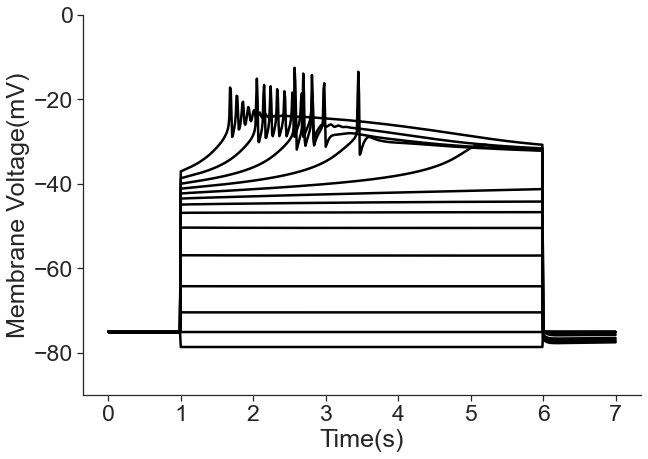

In [14]:
plt.figure(figsize = (10, 7))

for k in range(len(awa_voltage_sols)):

    plt.plot(np.linspace(0, 7, 701), awa_voltage_sols[k], linewidth = 2.5, color = 'black')
    plt.xlabel('Time(s)')
    plt.ylabel('Membrane Voltage(mV)')
    plt.ylim(-90, 0)
    sns.despine()